In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/1645792390_cep1_dataset.xlsx")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(302, 14)

1 duplicate record found

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
un = ["cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]

In [ ]:
for i in un:
  print(i)
  print(df[i].nunique())
  print("_____________")

cp
4
_____________
trestbps
49
_____________
chol
152
_____________
fbs
2
_____________
restecg
3
_____________
thalach
91
_____________
exang
2
_____________
oldpeak
40
_____________
slope
3
_____________
ca
5
_____________
thal
4
_____________


In [ ]:
dis =  ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

In [ ]:
cont =["age","trestbps","chol","thalach","oldpeak"]

In [ ]:
df[cont].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


<Axes: xlabel='target', ylabel='trestbps'>

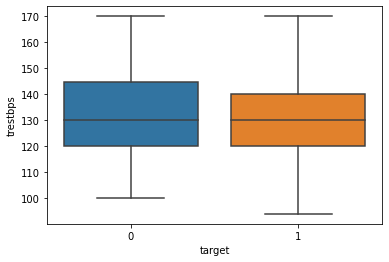

In [ ]:
sns.boxplot(data=df,y="trestbps",x="target")

<Axes: xlabel='target', ylabel='chol'>

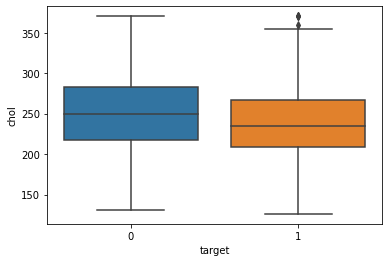

In [ ]:
sns.boxplot(data=df,y="chol",x="target")

<Axes: xlabel='target', ylabel='oldpeak'>

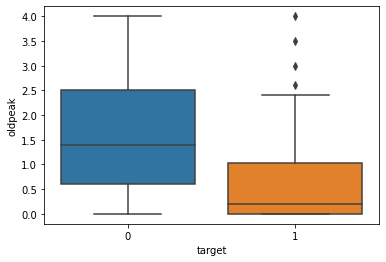

In [ ]:
sns.boxplot(data=df,y="oldpeak",x="target")

<Axes: xlabel='target', ylabel='thalach'>

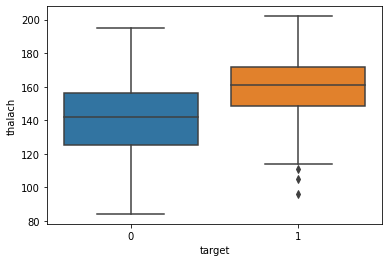

In [ ]:
sns.boxplot(data=df,y="thalach",x="target")

Outlier Detection and Handling

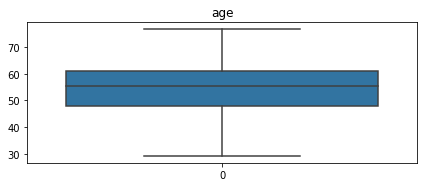

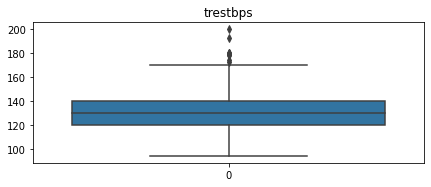

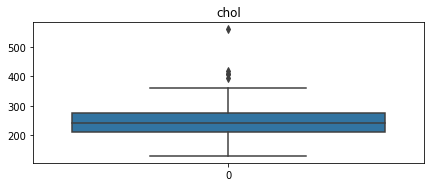

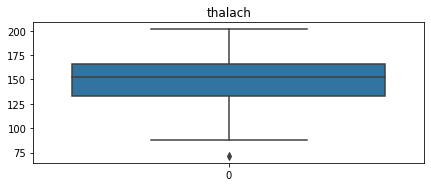

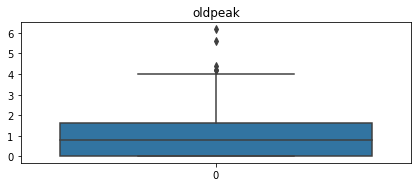

In [ ]:
a=1
for i in cont:
  plt.figure(figsize=(7,15))
  plt.subplot(len(cont),1,a)
  sns.boxplot(df[i])
  plt.title(i)
  a=a+1

In [ ]:
def iqr(i):
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1-(1.5 * IQR)
  upper = Q3 + (1.5 * IQR)
  return lower,upper

In [ ]:
#trestbps handling ouliers
low,high =iqr("trestbps")


df["trestbps"][df["trestbps"]<low]=low
df["trestbps"][df["trestbps"]>high]=high

<ipython-input-20-14c6276ae6be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trestbps"][df["trestbps"]<low]=low
<ipython-input-20-14c6276ae6be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trestbps"][df["trestbps"]>high]=high


In [ ]:
#trestbps handling ouliers
low,high =iqr("chol")

df["chol"][df["chol"]<low]=low
df["chol"][df["chol"]>high]=high

<ipython-input-21-d7397c1f2e95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["chol"][df["chol"]<low]=low
<ipython-input-21-d7397c1f2e95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["chol"][df["chol"]>high]=high


In [ ]:
#trestbps handling ouliers
low,high =iqr("thalach")


df["thalach"][df["thalach"]<low]=low
df["thalach"][df["thalach"]>high]=high

<ipython-input-22-1ba6d9479ae6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["thalach"][df["thalach"]<low]=low


In [ ]:
#trestbps handling ouliers
low,high =iqr("oldpeak")


df["oldpeak"][df["oldpeak"]<low]=low
df["oldpeak"][df["oldpeak"]>high]=high

<ipython-input-23-a90612f0d0a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["oldpeak"][df["oldpeak"]<low]=low
<ipython-input-23-a90612f0d0a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["oldpeak"][df["oldpeak"]>high]=high


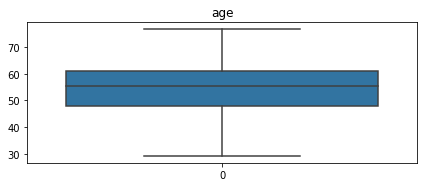

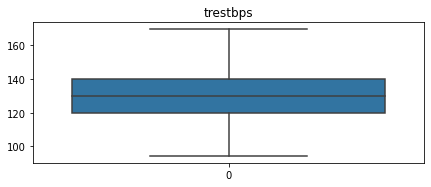

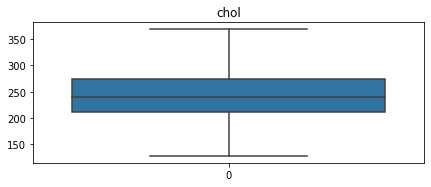

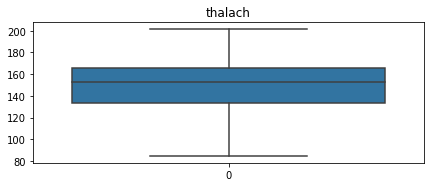

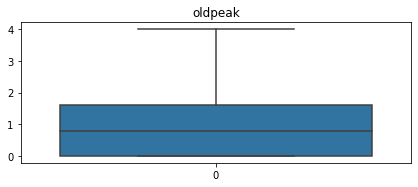

In [ ]:
a=1
for i in cont:
  plt.figure(figsize=(7,15))
  plt.subplot(len(cont),1,a)
  sns.boxplot(df[i])
  plt.title(i)
  a=a+1

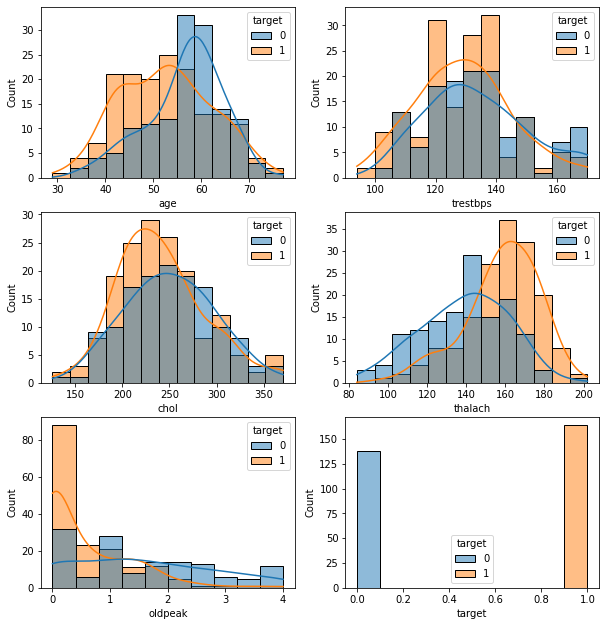

In [ ]:
a=0
plt.figure(figsize=(10,22))
for i in cont:
  a=a+1
  plt.subplot(6,2,a)
  sns.histplot(x=df[i],kde=True,hue="target",data=df)

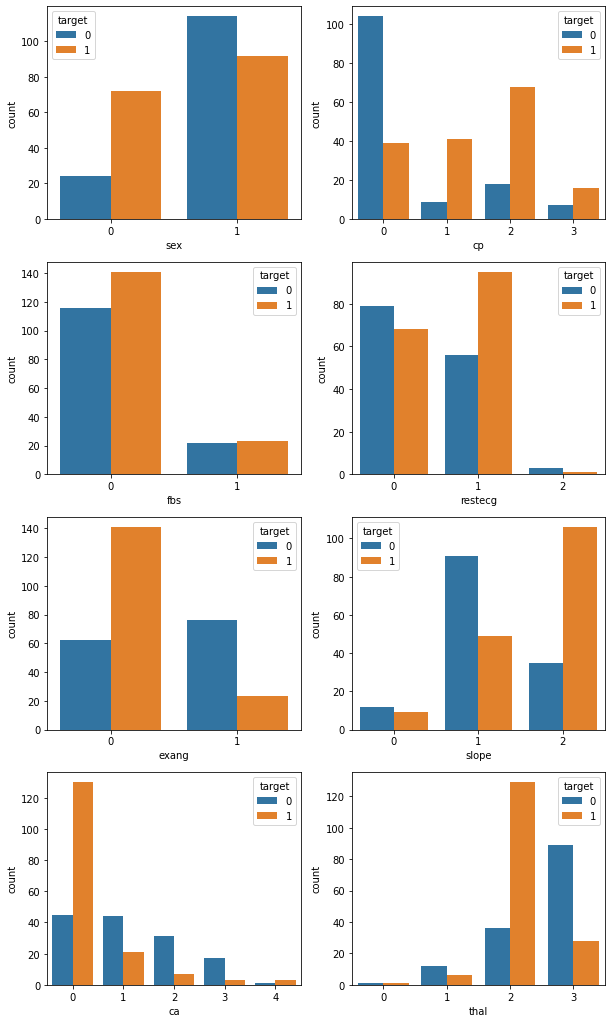

In [ ]:
a=0
plt.figure(figsize=(10,18))
for i in dis:
  a=a+1
  plt.subplot(4,2,a)
  sns.countplot(x=i,hue="target",data=df)

<Axes: xlabel='target', ylabel='age'>

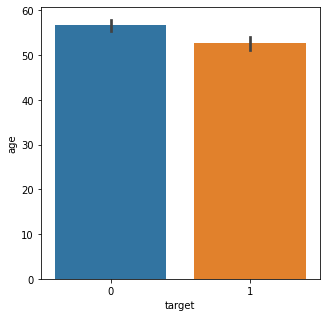

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(y="age",x="target",data=df)

<Axes: >

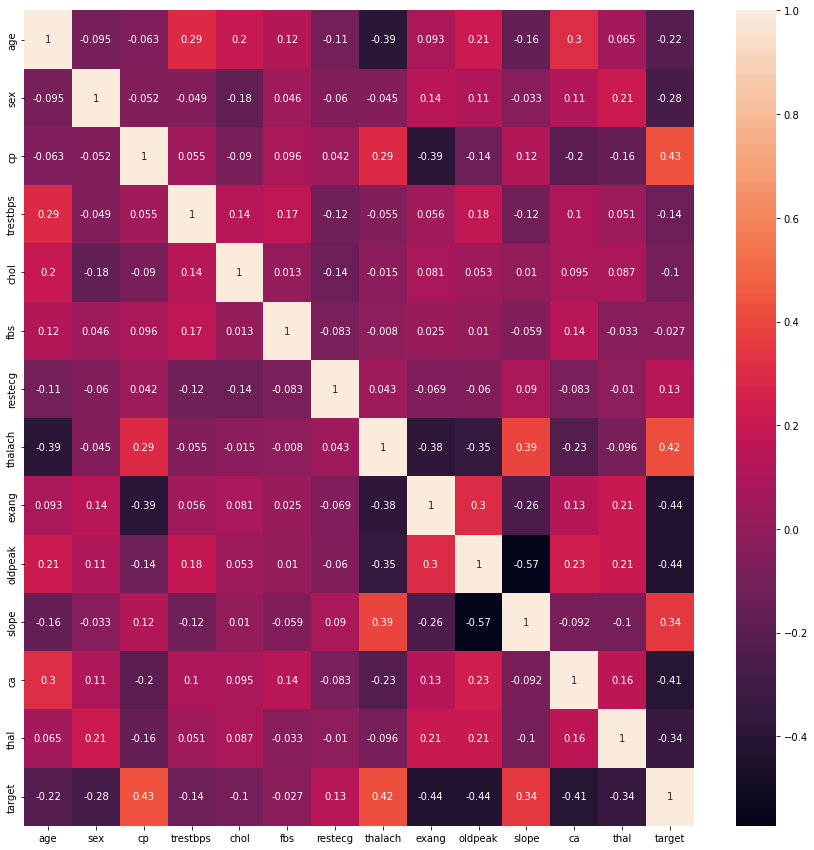

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

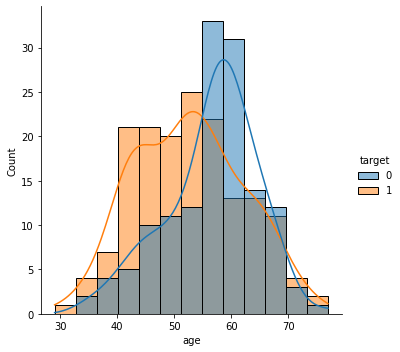

In [ ]:
sns.displot(df, x="age", hue="target",kde=True)

<Axes: title={'center': 'chol'}, xlabel='target'>

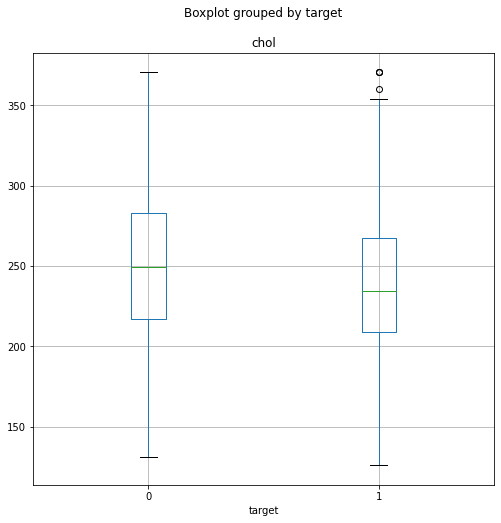

In [ ]:
df.boxplot(column="chol",by="target",figsize=(8,8))

Higher cholestoral levels have higher chances of heart attack

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
pair=cont
pair.append("target")

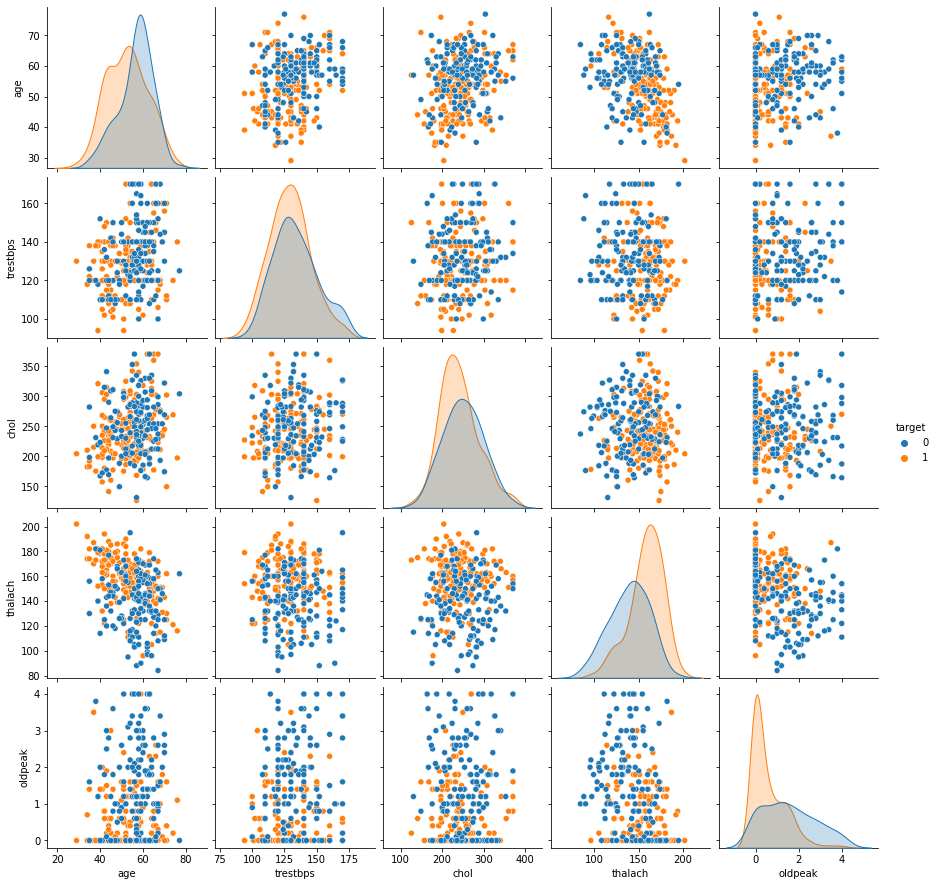

In [ ]:
sns.pairplot(df[pair],hue="target")

In [ ]:
dfcvd = df[df["target"]==1]

In [ ]:
sns

<module 'seaborn' from '/usr/local/lib/python3.9/dist-packages/seaborn/__init__.py'>

In [ ]:
x=df.drop("target",axis=1)
y=df.target

In [ ]:
import statsmodels.api as sm
xsm= sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, xsm).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     24.01
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.01e-38
Time:                        13:46:25   Log-Likelihood:                -107.21
No. Observations:                 302   AIC:                             242.4
Df Residuals:                     288   BIC:                             294.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8553      0.299      2.863      0.0

age, trestbps,chol,fbs,restecg,slope has low influence on target as they have p value higher than 0.05



In [ ]:
imp = ["age","trestbps","chol","fbs","restecg","slope","slope"]

In [ ]:
x = x.drop(imp,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x.columns

Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')

In [ ]:
xtrain.columns

Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')

Logistic regression Model with independent features as 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=900)
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=900)

In [ ]:
ypred = lr.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Random Forest Model with independent features as 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, criterion = "gini", max_depth=5)
rf.fit(xtrain,ytrain)


RandomForestClassifier(max_depth=5, n_estimators=300)

In [ ]:
ypredrn=rf.predict(xtest)

In [ ]:
print(classification_report(ytest,ypredrn))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

